### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
    
- лог сервера с данными об их посещениях,

- выгрузка их покупок за этот период,
- рекламные расходы.

Требуется изучить:
- откуда приходят пользователи и какими устройствами они пользуются,

- сколько стоит привлечение пользователей из различных рекламных каналов;

- сколько денег приносит каждый клиент,

- когда расходы на привлечение клиента окупаются,

- какие факторы мешают привлечению клиентов.

Импортируем необходимые библиотеки: pandas-для данных, datetime- для работы со временем и seaborn, matplotlib- для визуализации,numpy-для вычислений,warnings- для управления предупреждениями.

In [155]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

Загрузим данные о расходах, визитах и заказах в соответсвующие переменные.

In [156]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

Выгрузим первые пять строк каждой таблицы и информацию о них. Для каждой сделаем вывод.

In [157]:
display(visits.head(5))
visits.info()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В таблице visits данные полные, некорректно указан тип данных для колонок 'Session Start' и  'Session End'. В данных колонках указаны даты и время, а значит тип object некорректный. В дальнейшем изменим его.   

In [158]:
display(orders.head(5))
orders.info()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


В таблице orders данные полные, некорректно указан тип данных для колонки 'Event Dt'. В данной колонке указаны даты и время, а значит тип object некорректный. В дальнейшем изменим его.   

In [159]:
display(costs.head(5))
costs.info()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В таблице costs данные полные, некорректно указан тип данных для колонки 'dt'. В данной колонке указаны даты и время, а значит тип object некорректный. В дальнейшем изменим его.   

Проверим наличие дубликатов в таблицах

In [160]:
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


Дубликатов в таблицах нет.

Приведем  типы данных в порядок. 

In [161]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
display(visits.head(10))


,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [162]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [163]:
orders.columns = ['user_id', 'event_dt', 'revenue',]
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [164]:
costs.columns = ['dt', 'channel', 'costs',]

costs['dt'] = pd.to_datetime(costs['dt'])

Проверим есть ли пропущенные значения по таблицам

In [165]:
print(visits.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64


In [166]:
print(orders.isna().sum())

user_id     0
event_dt    0
revenue     0
dtype: int64


In [167]:
print(costs.isna().sum())

dt         0
channel    0
costs      0
dtype: int64


Вывод:
Пропусков и дубликатов данных нет. Наименования колонок приведены в читабельный формат. Типы данных приведены к требуемому.

Общий вывод: 

-У нас имеются три таблицы с данными (visits,costs, orders).

-Дубликатов и пропусков в данных нет.

-Типы данных приведены к корректному формату.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Создадим функцию для профилей пользователей. Присвоим ей название get_profiles()

In [168]:

def get_profiles(sessions, orders, cost): # создаем функцию

    # параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start']) # сортируем сессии по ID пользователя и дате первого посещения
        .groupby('user_id') # группируем по ID 
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',         #находим первые значения session_start и channel,device,region
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'}) # столбец с временем первого посещения переименуем в first_ts
        .reset_index()   # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    cost = cost.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    cost['acquisition_cost'] = cost['costs'] / cost['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        cost[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
profiles = get_profiles(visits, orders, costs)

Создадим функцию для подсчёта Retention Rate. Присвоим ей название get_retention().

In [169]:
observation_date = datetime(2019, 11, 1).date()  #укажем момент анализа. Будем считать, что на календаре 1 ноября 2019 года
horizon_days = 14  # горизонт анализа 
def get_retention(
    profiles,
    sessions,               # укажим аргументы функции: профили,сессии, момент и горизонт анализа.
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,  # опция «игнорировать горизонт анализа», по умолчанию False
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days


Создадим функцию для подсчёта конверсии. Присвоим ей название get_conversion().

In [170]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


 Создадим функции для подсчёта LTV. Присвоим название get_ltv().

In [171]:
def get_ltv(
    profiles,  # Аргументы- профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Добавим данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Строим таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Считаем сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Объединим размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Считаем LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Создаем функцию для сглаживания данных. Присвоим ей название filter_data().

In [172]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

Создаем функцию для визуализации retention. Назовем plot_retention().

In [173]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

Создадим функцию для визуализации конверсии. Назовем plot_conversion.

In [174]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей'.format(horizon))

    plt.tight_layout()
    plt.show() 

Создадим функцию для визуализации LTV и ROI. Назовем plot_ltv_roi().

In [175]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 
# считаем LTV и ROI

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)


Вывод: Были созданы функции для дальнейшего исследования.

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

Составим профили пользователей

In [176]:
display(profiles.head(10))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


Получаем данные с идентификатором пользователя, данными о первом посещении, идентификатором канала, используемом устройстве, регионе пользователя и рекламными раходами

Вычислим минимальные и максимальные даты привлечения пользователей.

Минимальная дата

In [177]:
min_date = profiles['dt'].min()

In [178]:
print(min_date)

2019-05-01 00:00:00


Максимальная дата

In [179]:
max_date = profiles['dt'].max() 

In [180]:
print(max_date)

2019-10-27 00:00:00


Минимальная дата привлечения 1 мая 2019 года
Максимальная дата привлечения 27 октября 2019 года

Узнаем из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Для этого построем таблицу с требуемыми данными.

In [181]:
region_users = pd.DataFrame()
region_users['amount_users'] = profiles.groupby('region')['user_id'].count()
region_users['amount_payers'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region_users['amount_per'] = 100*(region_users['amount_payers'] / region_users['amount_users'])
region_users.sort_values(by='amount_per', ascending=False).style.format({'amount_per': '{:.1f}%'})

,amount_users,amount_payers,amount_per
region,,,
United States,100002,6902,6.9%
Germany,14981,616,4.1%
UK,17575,700,4.0%
France,17450,663,3.8%


Больше всего платящих пользователей приходит из США (6.9 от общего количества) 

Узнаем какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [182]:
users_devices = pd.DataFrame()
users_devices['amount_users'] = profiles.groupby('device')['user_id'].count()
users_devices['amount_payers'] = profiles.query('payer == True').groupby('device')['user_id'].count()
users_devices['amount_per'] = 100*(users_devices['amount_payers'] / users_devices['amount_users'])
users_devices.sort_values(by='amount_per', ascending=False).style.format({'amount_per': '{:.1f}%'})

,amount_users,amount_payers,amount_per
device,,,
Mac,30042,1912,6.4%
iPhone,54479,3382,6.2%
Android,35032,2050,5.9%
PC,30455,1537,5.0%


Самыми популярными устройствами у пользователей являются устройства Mac, чуть менее популярными IPhone.

Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. 

In [183]:
users_channel = pd.DataFrame()
users_channel['amount_users'] = profiles.groupby('channel')['user_id'].count()
users_channel['amount_payers'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
users_channel['amount_per'] = 100*(users_channel['amount_payers'] / users_channel['amount_users']) 
users_channel.sort_values(by='amount_per', ascending=False).style.format({'amount_per': '{:.1f}%'})

,amount_users,amount_payers,amount_per
channel,,,
FaceBoom,29144,3557,12.2%
AdNonSense,3880,440,11.3%
lambdaMediaAds,2149,225,10.5%
TipTop,19561,1878,9.6%
RocketSuperAds,4448,352,7.9%
WahooNetBanner,8553,453,5.3%
YRabbit,4312,165,3.8%
MediaTornado,4364,156,3.6%
LeapBob,8553,262,3.1%


Самым популярным каналом притока платящих пользователей является FaceBoom

Общий вывод:

Входе исследовательского анализа данных мы выяснили: основные каналы привлечения платящих пользователей, популярные в использовании устройства, минимальную и максимальную дату привлечения пользователя, а также популярный регион пользователя.

- Минимальная дата привлечения пользователя 1 мая 2019 года;

- Максимальная дата привлечения пользователя 27 октября 2019 года;

- Больше всего платящих пользователей приходят из США (6,9%);

- Самым популярным устройством у платящих пользователей является Mac( его используют 6,4 % пользователей;

- Основным канал привлечения является FaceBoom (12,2%).

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

Посчитаем общую сумму рассходов на маркетинг. Для этого узнаем сумму расходов для каждого канала.

In [184]:
channel_cost = pd.DataFrame()
channel_cost['costs'] = costs.groupby('channel')['costs'].sum()
channel_cost.sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Вычилим общую сумму расходов по все каналам:

In [185]:
costs['costs'].sum().round()


105497.0

Общая сумма расходов на маркетинг составляет 105497. Топ-3 канала по рассходам : Tip Top, FaceBoom, WahooNetBanner.

Построим график распределения затрат каналов по месяцам и неделям

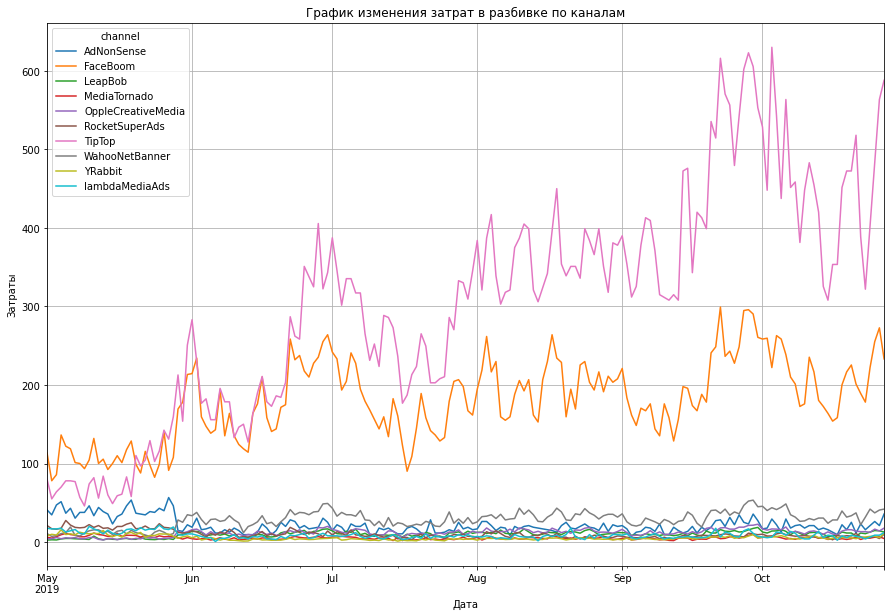

In [186]:
filtered_data = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(15, 10),
           grid=True,)

plt.title('График изменения затрат в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

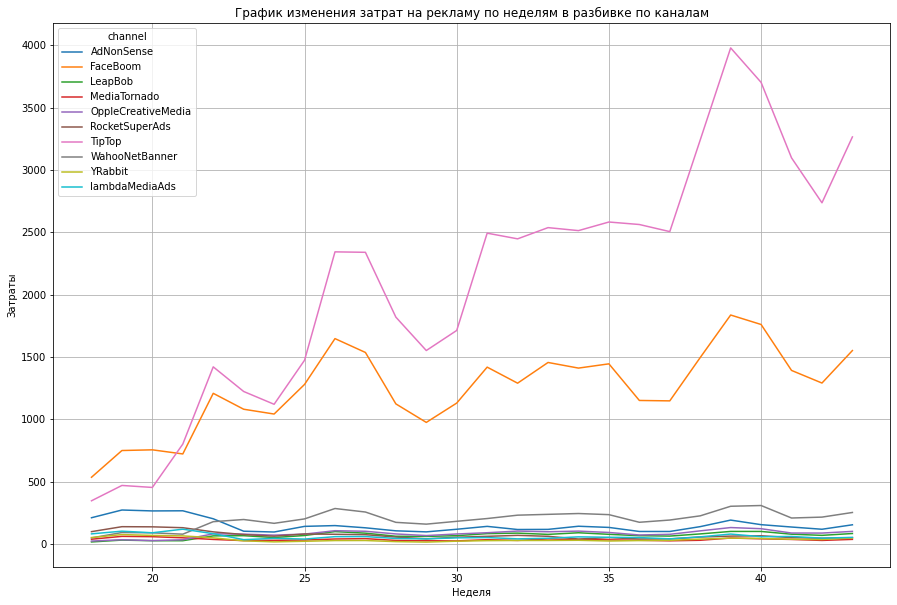

In [187]:
df = costs
df['week'] = pd.to_datetime(df['dt']).dt.isocalendar().week
df['month'] = pd.to_datetime(df['dt']).dt.month
 
#  график по недельным тратам на рекламу
filtered_data = df.pivot_table(
        index='week', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(15, 10),
           grid=True,)
 
plt.title('График изменения затрат на рекламу по неделям в разбивке по каналам')
plt.xlabel('Неделя')
plt.ylabel('Затраты')
plt.show()


В динамике расходы на рекламу растут у двух каналов ТipTop и YRabbit.

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

In [188]:
#Посмотрим на CAC для каждого источника трафика. Создадим отдельную таблицу.
cac_by_channel = pd.DataFrame()
# уберём органических пользователей:
profiles = profiles.query('channel != "organic"')
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False)

,acquisition_cost_mean
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Самым дорогим каналам для привлечения пользователя оказался TipTop (2.80)

Вывод: Таким образом мы поняли, что самым дорогим по расходам на рекламу является канал TipTop. Наблеюдается рост затрат на протяжении всего преиода. Общая сумма расходов по всем каналам 105497.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

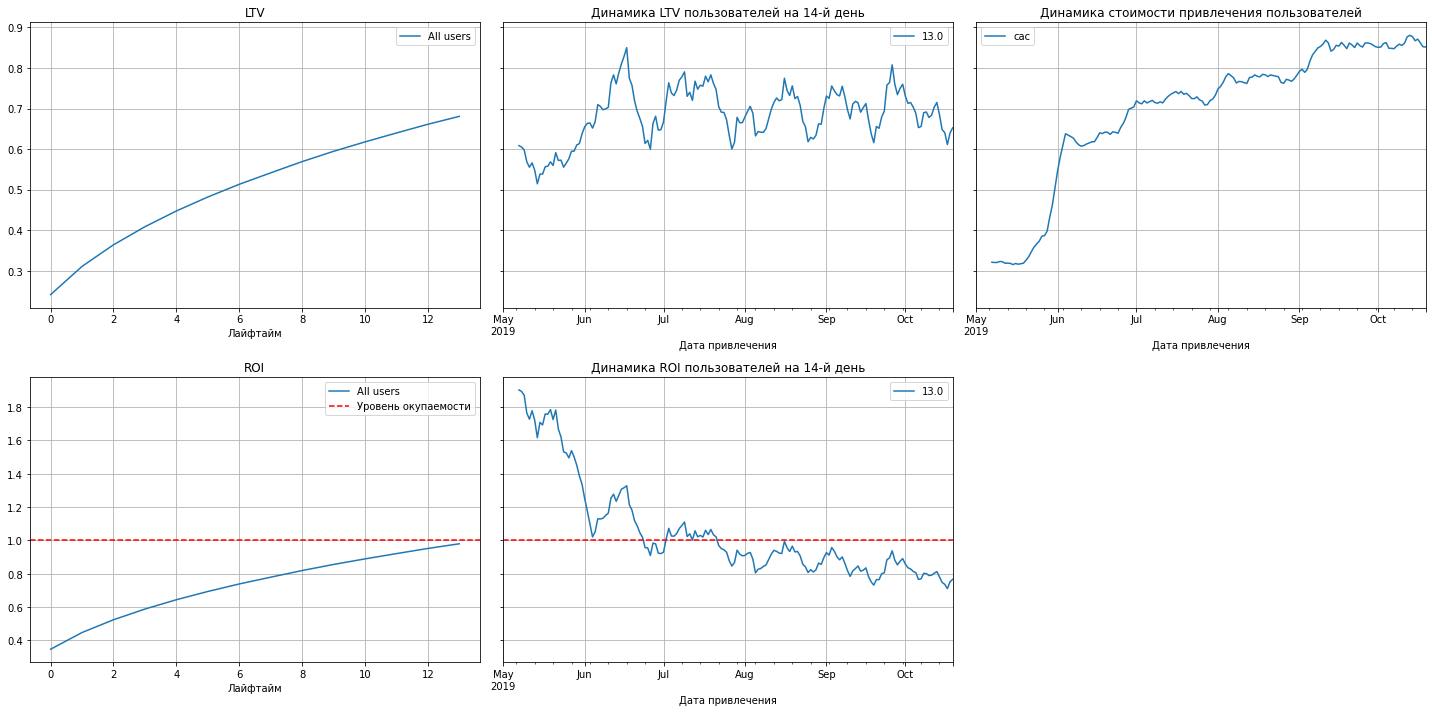

In [189]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Вывод по графикам окупаемости рекламы:
    
- LTV держится на примерно одном уровне на протяжении всего эксперимента

- CAC на протяжении всего эксперимента растёт

- ROI не доходит до уровня окупаемости

- Окупаемость пользователей падает с Июня

Проверим конверсию пользователей и динамику её изменения. 

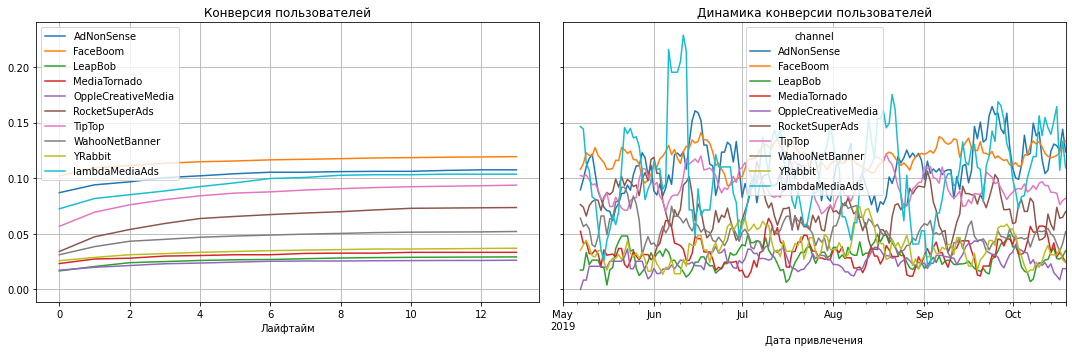

In [191]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
dimensions = ['channel']
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Вывод:
    
- Конверсия пользователей немного повышается на протяжении всего лайфтайма, но в целом держится на одном уровне для каждого канала.
- Аномальные скачки динамики происходят у пользователей, привлеченных из каналов lambdaMediaAds(возрастает в начале и в конце лета), а также у AdNonSense скачки в графике осенью и в середине лета.

Проверим удержание платящих и неплатящих пользователей и динамику изменений для них

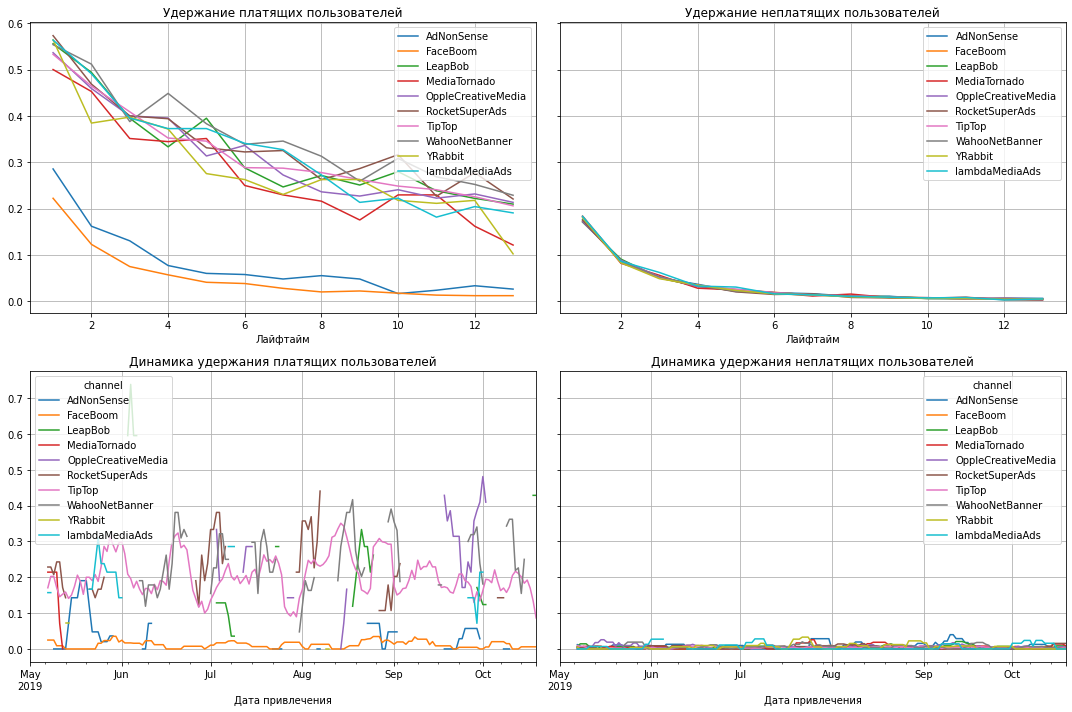

In [192]:

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
dimensions = ['channel']
plot_retention(retention_grouped, retention_history, horizon_days) 

Вывод: удержание платящих и неплотящих пользователей практически одинаковые.

Проанализируем окупаемость рекламы с разбивкой по устройствам. 

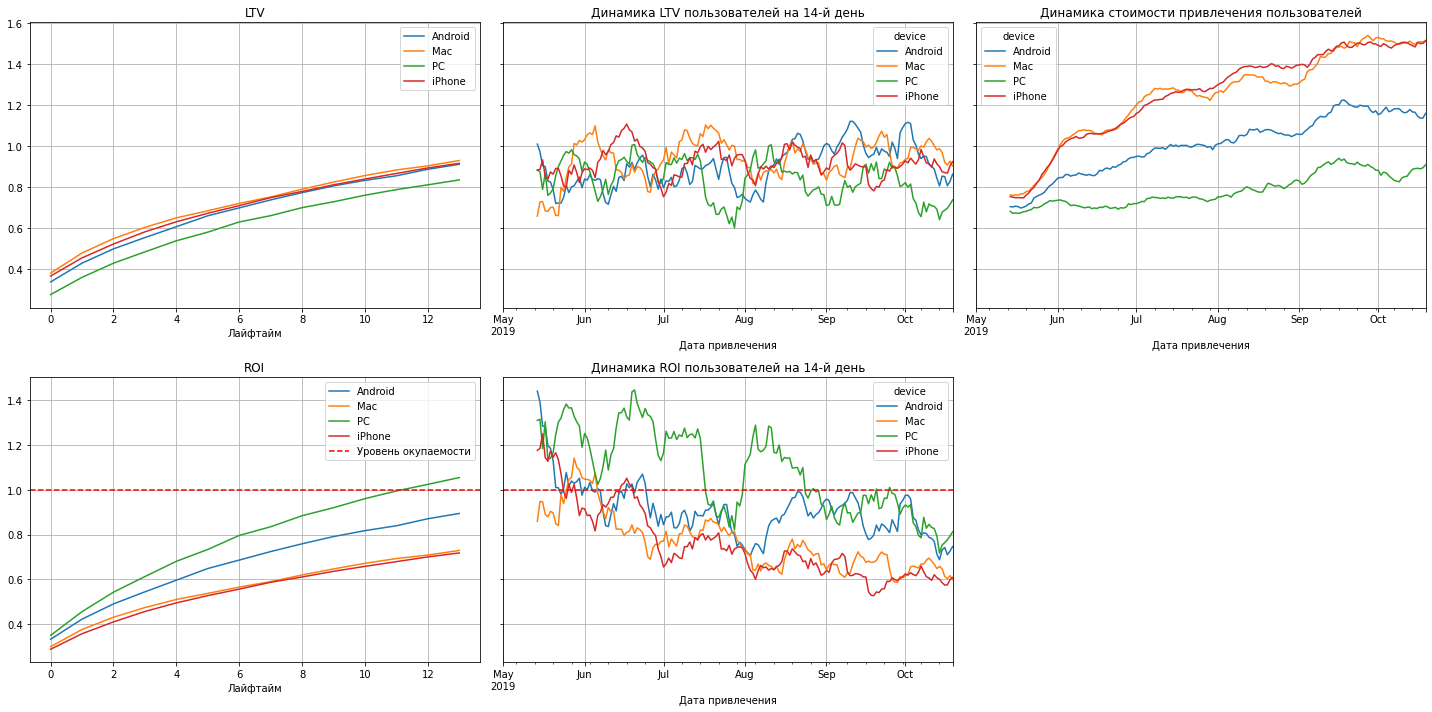

In [193]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вывод по графикам окупаемости с разбивкой по устройствам:
    
- LTV держиться примерно одинаково на протяжении всего эксперимента у всех устройств. В начале июня происходит скачок у Iphone.

- CAC на протяжении всего эксперимента растёт.

- ROI не доходит до уровня окупаемости y Mac и Iphone, Android, а у PC окупаются.

- Окупаемость пользователей начинает свое падение с Июня.

Проанализируем окупаемость рекламы с разбивкой по странам. 

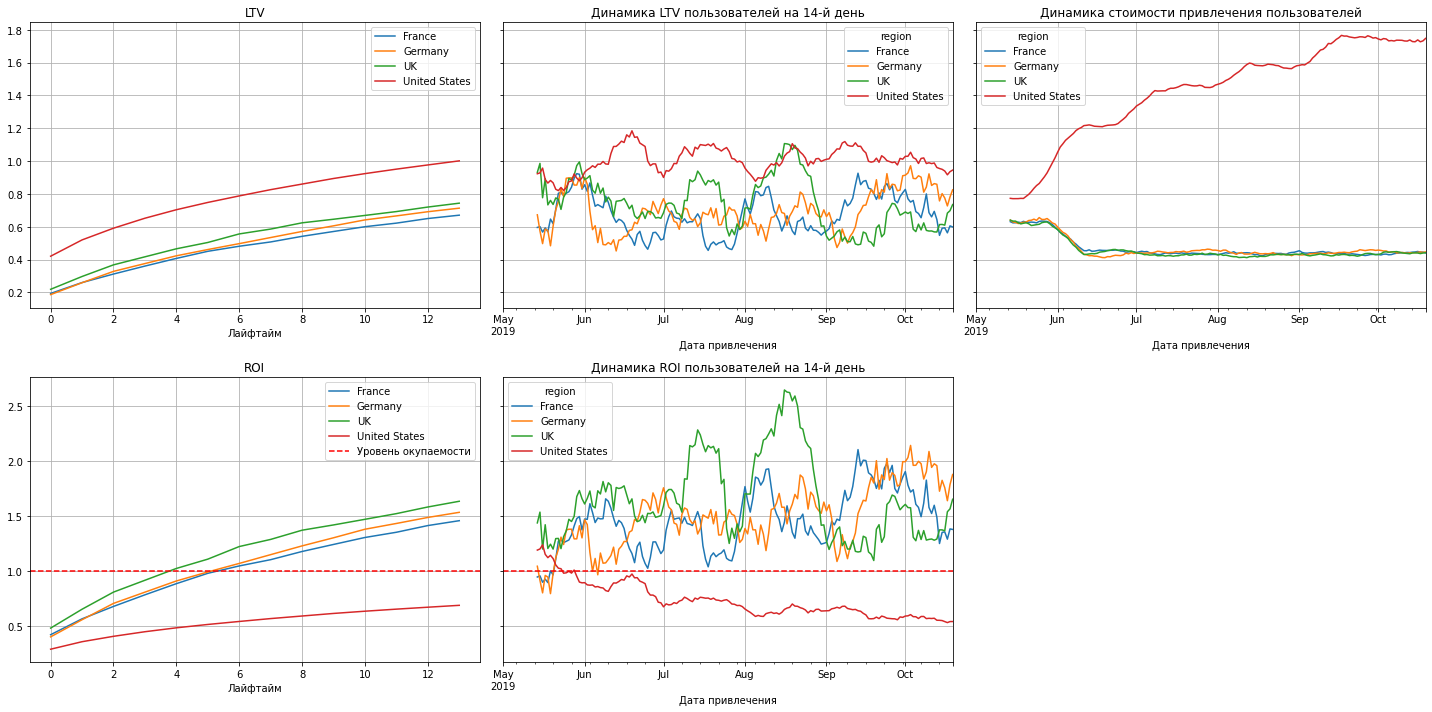

In [154]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вывод по графикам окупаемости с разбивкой по странам:
    
- LTV держиться примерно одинаково на протяжении всего эксперимента для всех регионов.

- CAC на протяжении всего эксперимента сильно растёт, только для США, для других регионов остается примерно на одном и том же уровне.

- ROI доходит до уровня окупаемости практически для всех регионов, кроме США.

- Окупаемость для США падает на протяжении всего периода.

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. 

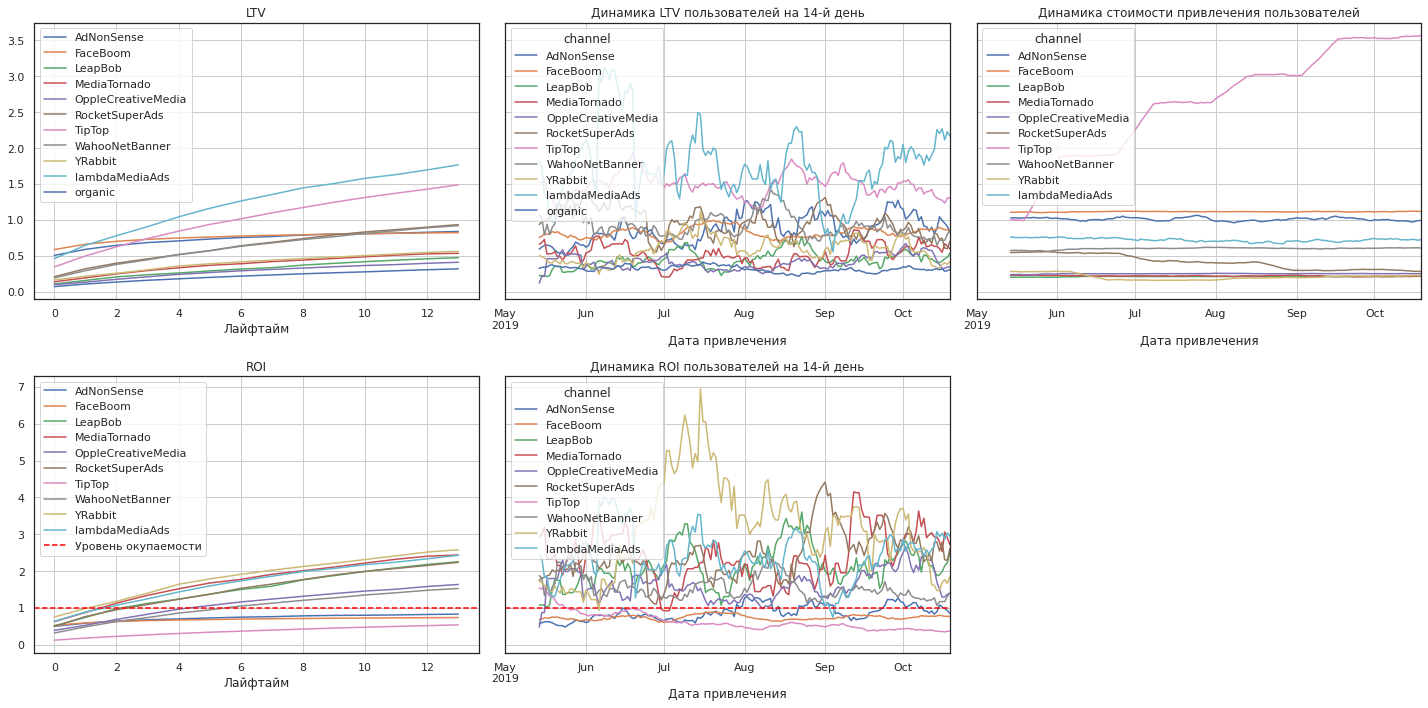

In [286]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вывод по графикам окупаемости с разбивкой по каналам привлечения:
    
- LTV держиться примерно одинаково на протяжении всего эксперимента для каналов, кроме lamdamediaAds. Для данного канала имеются резкие скачки и падения с промежутком в месяц.

- CAC на протяжении всего эксперимента на одном уровне для всех каналов, кроме TipTop, который показывает резкий рост с Июня.

- ROI доходит до уровня окупаемости практически для всех каналов, кроме FaceBoom,TipTop и AdNonSense.

- Окупаемость для практически всех каналов возврастает с приходом осени, кроме YRabbit, окупаемость, которого возрастает в самы разгар лета, а осенью наоборот снижается. .

Вывод по разделу:
 - Окупаемость рекламы падет на протяжении всего периода. Основное падение начинается в июне. Конверсия и удержание пользователей держится практически на одном уровне.
 
 - Негативное влияние могут оказать на окупаемость рекламы: страна-США, устройства: Mac и Iphone(динамика стоимости постоянно растет), каналы привлечения:FaceBoom,TipTop и AdNonSense( всегда ниже порога окупаемости).
 
 - Проблемы с окупаемостью возможно вызваны неправильным распределением средств на привлечение с каналов. При распределнии средств стоит учитывать, что самым непопулярным каналом является TipTop, и исследовать регион привлечения пользователей устройств РС. Также следует уделить внимание сезонности.


# Шаг 6. Напишите выводы
Выделите причины неэффективности привлечения пользователей.
Сформулируйте рекомендации для отдела маркетинга.

Основной причиной является некорректное распредление средств.

При распределнии средств стоит учитывать такие негативные факторы как: есть несколько кналов, которые не окупаются на протяжении исследуемого периода(AdNonSense, FaceBoom, TipTop), также регион пользователя США(окупаемость пользователей ниже всего именно из этой страны, а динамика стоимости привлечения только увеличивалась). Стоит обратить внимание сезонность, все показтели летом и осенью изменяются для указанных факторов региона и каналов. Также стоит учитывать используемые пользователями дивайсы:не окупаются Mac и Iphone.



- Специалистам из отдела маркетинга стоит переключить свое внимание на привлечение пользователей из стран: UK и Germany.

- Привлекать больше PC и Android пользователей.

- Рассмотреть для привлечения пользователей каналы: Yrabbit, MediaTornado, lambdaMediaAds (отличная окупаемость).


США, в целом судя по исследованию, убыточный регион для привлечения пользователей. Удержание низкое, окупаемость со временем падает, при этом динамика стоимости привлечения пользователей из США только растет. В июне возможно произошло что-то, что резко негативно повлияло на поведение пользователей. Рекламная система TipTop оказалась неэффективной, было вложено слишком много денег. Слишком необоснованое увеличение стоимости привлечение пользователей для этого канала, при не самой высокой конверсии.



У FaceBoom динамика удержания практически нулевая, при этом конверсия пользователей самая высокая. Как канал привлечния, FaceBoom отлично выполнял свою функцию. Возможно отделу маркетинга стоит обратить внимание на контент данного канала и изучив его, понять почему пропадает интерес пользователей. Если улучшить качество контента, тем самым повысить удержание платящих пользователей, то он станет более эффективным.